# Dynamics of the Periodically Driven Long-Range TF Ising Model

## Introduction
The 1-dimensional Ising model with long range spin exchange and periodicaly driven transverse field is modelled by the spin Hamiltonian 
$$
H(\beta, h_0, \omega, t) = -  \sum^N_{i<j}J_\beta\frac{\sigma^x_i\sigma^x_j}{|i-j|^\beta} - h_0 \cos{\left(\omega_D t\right)}\sum^N_i \sigma^z_i,
$$
where $J_\beta$ is chosen  as per the Kac prescription so as to keep the energy per spin finite in the thermodynamic limit. Thus,
$$
J_\beta = \frac{N^{1-\beta}}{\sum^N_{i\neq j}|i-j|^{-\beta}}.
$$
Consider the case $\beta = 0$, where $J_0 = 2/(N-1)$. In the thermodynamic limit ($N\rightarrow\infty$), this system approaches the mean-field dynamics given by the driven Lipkin-Meshkov-Glick (LMG) model [1]. Here, the many body state is completely uncorrelated and can be written as a product state *viz* $|\Psi(t)\rangle \overset{N\rightarrow\infty}{=} \displaystyle\prod^N_{i=1} |\psi_{MF}(t)\rangle$ [2], where all the $|\psi_{MF}(t)\rangle$'s are identical and obey the self-consistently updated Non - Linear Schrödinger Equation (NLSE) given by
$$
i \frac{\mathrm d}{\mathrm{d}t}|\psi_{MF}(t)\rangle = \widetilde{H}\big\{|\psi_{MF}(t)\rangle, t\big\}|\psi_{MF}(t)\rangle,
$$
where
$$
\widetilde{H}\big\{|\psi_{MF}(t)\rangle, t\big\} =  -  \langle \psi_{MF}(t)|\sigma^x|\psi_{MF}(t)\rangle\;\sigma^x -  h_0 \cos{\left(\omega_D t\right)}\;\sigma^z.
$$
Note that, absent the self-consistent field update, the equation above reduces to the dynamics of a driven Two-Level system (TLS), where $\widetilde{H}\big\{ t\big\} = J\;\vec{\sigma}\cdot\vec{r}(t)$, and $\vec{r} = -\hat{x} - h_0\hat{z}\cos{\omega_D t}$. In that case, for $\omega \gg 1$, the Rotating Wave Approximation (RWA) can be taken and system will undergo coherent destruction of tunnelling (CDT) when $J_0(\eta)=0$, where $J_0$ is the zeroth order Bessel Function, and $\eta = 2h_0/\omega_D$ [3]. In the CDT limit, all single particle expectation values are 'frozen' at their values at $t=0$. Our goal is to determine if this phenomenon survives in the exact dynamics for any value of $\beta$ due, perhaps, to topological considerations. Note that CDT can also be seen for $\beta = \infty$ due to the integrability of the nearest-neighbour model via the Jordan-Wigner Transformation [4]. In this limit, CDT can persist even for finite $N$ [5], as well as in the presence of disorder [6].  However, $H(\infty, \dots)$ is not homotopic with $H(0, \dots)$.

## Numerical Investigation for  $\beta = 0$. 
We look at the Mean-Field dynamics of the LMG model described above. The simulation is relatively simple, and we start from the numerically obtained ground state of the zero-field Hamiltonian (note that this is just the eigenstate of $\sigma^x$, it does not appear to be interesting to start from an eigenstate of $\sigma^z$, as then the MF dynamics becomes trivial due to $\langle \sigma^x\rangle$ vanishing at all times.). We compute the temporal fluctuations in the spins
$\delta Q = \delta Q^x + \delta Q^y + \delta Q^z$, where 
$$
\delta Q^\mu = \overline{\langle \sigma^\mu(t) \rangle^2} -  \overline{\langle \sigma^\mu(t) \rangle}^2,
$$
where for any quantity $f(t)$, the long-time average $\overline{f(t)}\equiv \displaystyle\lim_{T\to\infty} \displaystyle\int^T_0\mathrm{d}t\; f(t) $, and plot it as a function of $\omega_D$ for a fixed (large) amplitude $h_0$. We compare results for the dynamics of both $\widetilde{H}\big\{|\psi_{MF}(t)\rangle, t\big\}$ and $\widetilde{H}\big\{ t\big\}$ in order to see the fate of CDT due to the mean field dynamics. The code and output are given below.

### Magnetization Plots

Below lie the code and data for evaluating and plotting the magnetization $\langle \sigma^z\rangle$ as a function of time for both the Mean field (MF) dynamics and the Two-level system (TLS) dynamics for the problem above. For a fixed $h_0$, three values of $\omega_D$ are chosen *viz.*, one when $\omega_D = h_0$, one for which $J_0(\displaystyle\frac{2h_0}{\omega_D}) = 0$ and freezing for the TLS dynamics is expected, and one for which a similar freezing in the MF dynamics can be observed.

The first and third columns contain plots of $\langle \sigma^x\rangle$ and $\langle \sigma^z\rangle$ as a function of time $t$ (in units of $\hbar/J$ for exchange energy $J$), and the second and fourth columns contain the corresponding Fourier signals, defined as
$$
S^{x, z}_\omega = \int^\infty_{-\infty}\mathrm{d}t\; \left[\langle\sigma^{x, z} (t)\rangle - \overline{\langle \sigma^{x,z}(t) \rangle}\right]\; e^{-i\omega t},
$$
plotted in arbitrary units as functions of $\omega\over\omega_D$. I have removed the contribution of the long time average from the signal for the sake of clarity. Note that, when $J_0(\displaystyle\frac{2h_0}{\omega_D}) = 0$, the TLS response loses all frequencies except for the trivial $\omega = \omega_D$, but the MF response does not. However, at around $\omega \approx 15$ (when $h_0 = 25$), the MF signal appears to be completely frozen at the initial state, as can be seen from the signal analysis.
## References
1. Lipkin, H. J., N. Meshkov, and A. J. Glick. “Validity of Many-Body Approximation Methods for a Solvable Model: (I). Exact Solutions and Perturbation Theory.” Nuclear Physics 62, no. 2 (February 1, 1965): 188–98. https://doi.org/10/fpqf4q.
2. Mori, T. “[1810.01584] Prethermalization in the Transverse-Field Ising Chain with Long-Range Interactions.” Accessed October 30, 2019. https://arxiv.org/abs/1810.01584.
3. Miao, Qiang, and Yujun Zheng. “Coherent Destruction of Tunneling in Two-Level System Driven across Avoided Crossing via Photon Statistics.” Scientific Reports 6, no. 1 (June 29, 2016): 1–12. https://doi.org/10.1038/srep28959.
4. Das, Arnab. “Exotic Freezing of Response in a Quantum Many-Body System.” Phys. Rev. B 82, no. 17 (November 2010): 172402. https://doi.org/10.1103/PhysRevB.82.172402.
5. Hegde, Swathi S., Hemant Katiyar, T. S. Mahesh, and Arnab Das. “Freezing a Quantum Magnet by Repeated Quantum Interference: An Experimental Realization.” Physical Review B 90, no. 17 (November 7, 2014): 174407. https://doi.org/10.1103/PhysRevB.90.174407.
6. Roy, Analabha, and Arnab Das. “Fate of Dynamical Many-Body Localization in the Presence of Disorder.” Physical Review B 91 (2015): 121106. https://doi.org/10/gcz8z2.

In [ ]:
import numpy as np
from numpy.linalg import multi_dot, norm, eig
from odeintw import odeintw
from scipy.signal import find_peaks

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

fs = 15
pheightmin = 5

fig, axs = plt.subplots(3, 2, sharex='col', figsize=(15,12))

sx = np.array([[0, 1],[ 1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])

t = np.linspace(0, 200, 10000)
h0 = 25.0
eta = 2.40482555769577
omegas = [h0, 2.0 * h0/eta, 14.5012741]

lastplot = len(omegas) - 1

def mf_jac (psi, t, h0, omega):
    sx_mf = multi_dot([psi.conjugate(), sx, psi])
    jac = (1j) * (sx_mf * sx + h0 * np.cos(omega *t)* sz)
    return jac

def mf_func (psi, t, h0, omega):
    return np.dot(mf_jac(psi, t, h0, omega), psi)

def tls_jac (psi, t, h0, omega):
    jac = (1j) * (sx + h0 * np.cos(omega *t)* sz)
    return jac

def tls_func (psi, t, h0, omega):
    return np.dot(tls_jac(psi, t, h0, omega), psi)

#Start from the t=0 ground state
#evals, evecs = eig((1j) * tls_jac(None, 0.0, h0, 1.0))
#psi0 = evecs[:,np.argmin(evals)].copy()

#Start from eigenstate of sx
evals, evecs = eig((1j) * tls_jac(None, 0.0, 0.0, 0.0))
psi0 = evecs[:,np.argmin(evals)].copy()

for i, w in enumerate(omegas):
    # Set up the inputs and call odeintw to solve the system.
    sol_mf = odeintw(mf_func, psi0, t, args=(h0, w), Dfun=mf_jac)
    sol_tls = odeintw(tls_func, psi0, t, args=(h0, w), Dfun=tls_jac)
    #calculate expectation values
    mx_mf = np.einsum("ij,jk,ik->i", sol_mf.conjugate(), sx, sol_mf)
    mz_mf = np.einsum("ij,jk,ik->i", sol_mf.conjugate(), sz, sol_mf)
    mx_tls = np.einsum("ij,jk,ik->i", sol_tls.conjugate(), sx, sol_tls)
    mz_tls = np.einsum("ij,jk,ik->i", sol_tls.conjugate(), sz, sol_tls)
    
    axs[i, 0].set_title(r"$\omega_D = {}$, ".format(w) + r"$h_0 = {}$ ".format(h0), fontsize=fs)
    axs[i, 0].plot(t, mz_tls.real,'r', label = "TLS Soln")
    axs[i, 0].plot(t, mz_mf.real, 'b', label = "MF Soln", alpha=0.7)
    axs[i, 0].set_ylabel(r'$\langle\sigma^z\rangle$',fontsize=fs, rotation=0)
    axs[i, 0].tick_params(direction='in', length=8, width=3, labelsize=fs)
    axs[i, 0].set_yticks([-1.,-0.5,0.,0.5,1.], minor=False)
    axs[i, 0].set_ylim(-1.1, 1.1)
    
    #Now, FFT
    freqs_mf = np.fft.fftshift(np.fft.fftfreq(np.size(mz_mf), d=t[1]-t[0]))
    spectrum_mf = np.fft.fftshift(np.fft.fft(mz_mf - np.average(mz_mf)))
    freqs_tls = np.fft.fftshift(np.fft.fftfreq(np.size(mz_tls), d=t[1]-t[0]))
    spectrum_tls = np.fft.fftshift(np.fft.fft(mz_tls - np.average(mz_tls)))
    axs[i, 1].set_ylabel(r'$S^z_\omega$',fontsize=fs, rotation=0)
    axs[i, 1].tick_params(direction='in', length=8, width=3, labelsize=fs)
    axs[i, 1].plot(2.0 * np.pi * freqs_tls.real/w, np.abs(spectrum_tls),'r', label = "TLS Soln")
    axs[i, 1].plot(2.0 * np.pi * freqs_mf.real/w, np.abs(spectrum_mf),'b', label = "MF Soln", alpha=0.6)
    peaks, _ = find_peaks(np.abs(spectrum_mf), height=pheightmin)
    axs[i, 1].plot(2.0 * np.pi * freqs_mf[peaks].real/w, np.abs(spectrum_mf[peaks]), "x", label = "MF Peaks", alpha=0.6)
    axs[i, 1].set_ylim(-0.01, 1600)
    axs[i, 1].set_xlim(-0.1, 2.2)

axs[lastplot, 0].set_xlabel(r'$t\;(\hbar/J)$',fontsize=fs)    
axs[lastplot, 1].set_xlabel(r'$\omega/\omega_D$',fontsize=fs)

legend0 = axs[0, 1].legend(prop={'size': fs})

# Norm sanity check
#plt.plot(t, np.abs(sol_mf[:, 0])**2 + np.abs(sol_mf[:, 1])**2)
fig.tight_layout()


### Plots in the Parameter Space

We now look at (MF only)plots of the mean and standard deviation of the time signal as functions of $h_0$, $\omega$. The code below (self expanatory) does just this. Note that, for $h_0 = 25 $, both $Q$ and $\delta Q$ nearly vanish for a discrete set of values of $\omega\lesssim h_0$ (indicated by blue 'x'), signifying a freeze of the system in its initial state. These points of near-infinite freezing (for sufficiently large $\omega_D$ so as to discount adiabatic effects) are shown in $h$ - $\omega_D$ space, with the linear dependence shown in the inset.

In [ ]:
import numpy as np
from numpy.linalg import norm, eig
from multiprocessing import Pool
import lipkin as mfd
import time
from scipy.interpolate import InterpolatedUnivariateSpline

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

if __name__ == '__main__':
    evals, evecs = eig((1j) * mfd.tls_jac(None, 0.0, 0.0, 0.0))
    psi0 = evecs[:,np.argmin(evals)].copy()
    h0 = 25.0
    omegas = np.linspace(0., 3.5 * h0, 1000)
    t = np.linspace(0, 500, 20000)
    start = time.time()
    p = Pool(processes = 14)
    q_mf = p.starmap(mfd.avg_mag_mf,[(t, psi0, h0, w) for w in omegas])
    dq_mf = p.starmap(mfd.sd_mag_mf,[(t, psi0, h0, w) for w in omegas])
    elapsed = (time.time() - start)  
    print("\n","time elapsed is :", elapsed, " s")
    fname = "meanfield_driven_h0_{}".format(h0) + "_Q_dQ.csv"
    np.savetxt(fname,np.vstack((omegas, q_mf, dq_mf)).T,delimiter=',')
    #print("Data saved in file: " + fname)
    
    fs = 25
    threshold = 0.015
    
    fig, axs = plt.subplots(1, 2, figsize=(15,7.5))
    axs[0].plot(omegas, q_mf,'b')
    axs[0].set_ylabel(r'$ Q$',fontsize=fs, rotation="vertical")

    axs[1].plot(omegas, dq_mf,'b')
    axs[1].set_ylabel(r'$\delta Q$',fontsize=fs, rotation="vertical")

    #Interpolate the stdev and find the minima
    #SciPy has a built-in method to find the roots of a cubic spline.
    #So, Use a 4th degree spline for interpolation, so that the roots of its derivative can be found easily.
    f = InterpolatedUnivariateSpline(omegas, dq_mf, k=4)
    cr_pts = f.derivative().roots() #Get the extrema
    cr_vals = f(cr_pts)
    dderiv = f.derivative(n=2)

    mins = cr_pts[(dderiv(cr_pts) > 0) & (cr_vals <= threshold)] #Select only minima near 0
    sd_mins = cr_vals[(dderiv(cr_pts) > 0) & (cr_vals <= threshold)]
    axs[1].plot(mins, sd_mins, "x")

    for ax in axs:
        ax.set_xlabel(r'$\omega$',fontsize=fs)
        ax.tick_params(direction='in', length=12, width=3, labelsize=fs)
        ax.set_title(r"$h_0 = {}$ ".format(h0), fontsize=fs)
    fig.tight_layout()
    plt.plot()
    print("Freezing at:")
    print(np.vstack((mins, sd_mins)).T)


In [ ]:
import numpy as np
import json
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.axes_grid.inset_locator import inset_axes
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
fs = 15

with open('minimum_sz_variance_time_500_jsonfile.json') as f:
  data = json.load(f)

with open('minimum_sz_variance_time_500_part2_jsonfile.json') as f:
  data2 = json.load(f)

amps = data["ampls"]
frozen_freqs = data["minfreqs"]
#Outlier
del frozen_freqs[7][0]
d1 = []
d2 = []
for i, h in enumerate(amps):
    omegas =  frozen_freqs[i]
    for omega in omegas:
        if omega <= 20 and omega >= 8:
            d2.append(np.array([omega, h]))
        elif omega <= 20:
            d1.append(np.array([omega, h]))
d1, d2 = np.array(d1), np.array(d2)

amps2 = data2["ampls"]
frozen_freqs2 = data2["minfreqs"]

fig, (ax, ax2) = plt.subplots(1, 2, figsize=[16, 8])

ax.tick_params(direction='in', length=12, width=3, labelsize=fs)
axins = inset_axes(ax, width="30%", height="50%", loc=4, borderpad=1)
axins.tick_params(direction='in', length=6, width=1, labelsize=fs/2)
axins.plot([], [], ' ', label=r"Slope $m$:")
axins.plot(d1[:,0], d1[:,1],"bo")
m,b = np.polyfit(d1[:,0], d1[:,1], 1)
w = np.linspace(6.0, 8.0, 1000)
axins.plot(w, m * w + b, "--" ,label=r"$m  = $ %g "% m)
axins.plot(d2[:,0], d2[:,1],"bo")
m,b = np.polyfit(d2[:,0], d2[:,1], 1)
axins.plot(d2[:,0], m * d2[:,0] + b,label=r"$m  = $ %g "% m)
axins.legend(loc=1)

for i, h in enumerate(amps):
    omegas =  frozen_freqs[i]
    for omega in omegas:
        ax.plot(omega, h,"bo")
        
for i, h in enumerate(amps2):
    omegas =  frozen_freqs2[i]
    for omega in omegas:
        ax.plot(omega, h,"bo")

ax.set_xlabel(r"$\omega_D$", fontsize= fs)
ax.set_ylabel(r"$h_0$",fontsize= fs)
ax.set_xlim([-10, 161.2]) 

plt.show()
#plt.savefig("plot.png")

# Finite Size Contributions

Mean Field Solution Completed.
Running Finite Size Exact Dynamics for h0 = 25.000000 and omega = 25.000000:

Dumping outputs to dictionary ...
Exact Solution for N = 8 Completed.
Mean Field Solution Completed.
Running Finite Size Exact Dynamics for h0 = 25.000000 and omega = 20.791529:

Dumping outputs to dictionary ...
Exact Solution for N = 8 Completed.


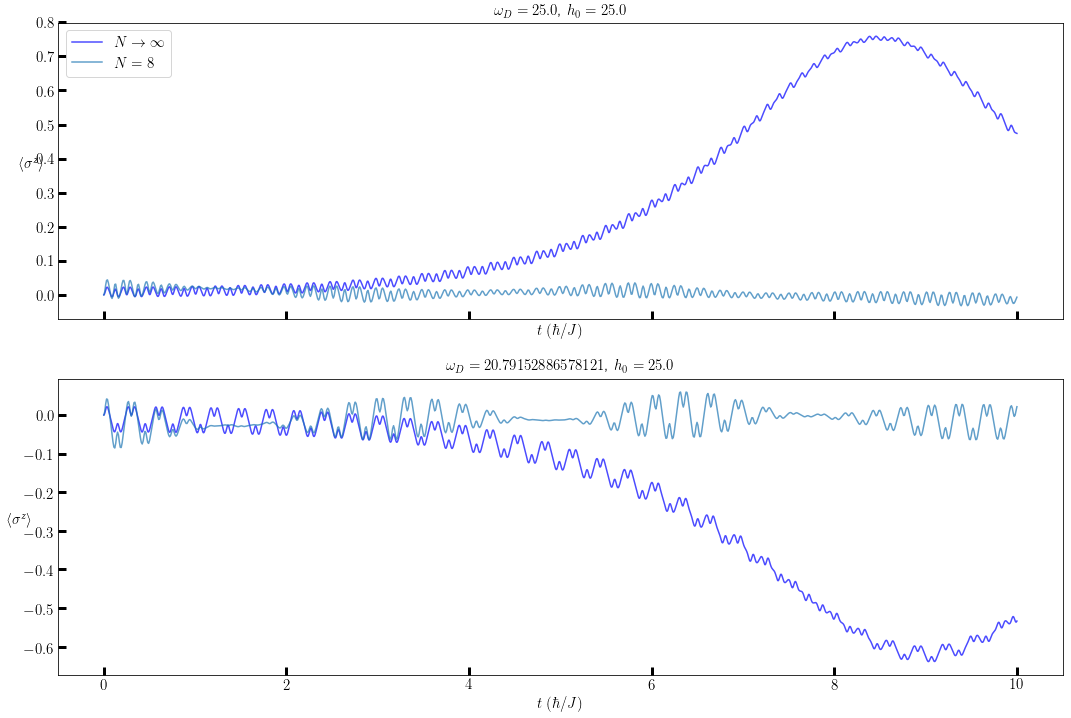

In [2]:
import numpy as np
from numpy.linalg import multi_dot, norm, eig
from odeintw import odeintw
from scipy.signal import find_peaks

import curie_weiss_periodic as cp

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

fs = 15
pheightmin = 5

sx = np.array([[0, 1],[ 1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])

t = np.linspace(0, 10, 10000)
t_exact = np.linspace(0, 10, 1000)

h0 = 25.0
finite_sizes = 8

eta = 2.40482555769577

omegas = [h0, 2 * h0/eta]

fig, axs = plt.subplots(len(omegas), 1, sharex='col', figsize=(18,12))

def mf_jac (psi, t, h0, omega):
    sx_mf = multi_dot([psi.conjugate(), sx, psi])
    jac = (1j) * (sx_mf * sx + h0 * np.cos(omega *t)* sz)
    return jac

def mf_func (psi, t, h0, omega):
    return np.dot(mf_jac(psi, t, h0, omega), psi)

def tls_jac (psi, t, h0, omega):
    jac = (1j) * (sx + h0 * np.cos(omega *t)* sz)
    return jac

def tls_func (psi, t, h0, omega):
    return np.dot(tls_jac(psi, t, h0, omega), psi)

#Exact Diagonalization of finite sizes
def exact_dynamics(p):
    h = cp.Hamiltonian(p)
    initstate =  np.ones(2**p.lattice_size, dtype="float64")/np.sqrt(2**p.lattice_size)
    #initstate = np.zeros(2**p.lattice_size)
    #initstate[0] = 1.0
    return cp.run_dyn(p, initstate)

#Start from eigenstate of sx
evals, evecs = eig((1j) * tls_jac(None, 0.0, 0.0, 0.0))
psi0 = evecs[:,np.argmin(evals)].copy()
#psi0 = np.array([1 + (1j) * 0, 0 + (1j) * 0])

for i, w in enumerate(omegas):
    # Set up the inputs and call odeintw to solve the mean field system.
    sol_mf = odeintw(mf_func, psi0, t, args=(h0, w), Dfun=mf_jac)
    #calculate expectation values
    mz_mf = np.einsum("ij,jk,ik->i", sol_mf.conjugate(), sz, sol_mf)
    print("Mean Field Solution Completed.")

    axs[i].set_title(r"$\omega_D = {}$, ".format(w) + r"$h_0 = {}$ ".format(h0), fontsize=fs)
    axs[i].set_xlabel(r'$t\;(\hbar/J)$',fontsize=fs)    
    axs[i].set_ylabel(r'$\langle\sigma^z\rangle$',fontsize=fs, rotation=0)
    axs[i].tick_params(direction='in', length=8, width=3, labelsize=fs)
    axs[i].plot(t, mz_mf.real, 'b', label = r"$N\to\infty$", alpha=0.7)
    print("Running Finite Size Exact Dynamics for h0 = %f and omega = %f:"%(h0, w))
    n = finite_sizes
    J = np.ones(n**2).reshape(n,n) * 2.0 / (n-1)
    # Set up the inputs and call curie_weiss_periodic to solve the exact system.
    p = cp.ParamData(hopmat = J, lattice_size=n, omega=w, times=t_exact, hx=0.0, hy=0.0, hz=-h0, jx=-1.0, jy=0.0, jz=0.0)
    ed_data = exact_dynamics(p)
    print("Exact Solution for N = %d Completed." % n)    
    axs[i].plot(t_exact, np.real(ed_data["sz"]), label = r"$N = %d$" % n, alpha=0.7)

legend0 = axs[0].legend(prop={'size': fs})